# Agrupar los expedientes clínicos de acuerdo a su estado y municipio con K-means

## Implementando K-means en Python con Sklearn

In [1]:
#https://aprendeia.com/importar-y-exportar-datos-en-python/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
dataframe = pd.read_csv(r"paciente2020Final.csv")
dataframe.head()
# desplegará los primeros 5 registros del archivo paciente2020.cvs

,idconsulta,fecha,hora,especialidad,expediente,sexo,edad,municipio,estado,derechohabiente,id_dx
0,28943300245,02/01/2020,30:28.0,22,34820,1,46,9,7,8,D434
1,28943400245,02/01/2020,10:58.0,22,35731,0,63,105,7,8,I601
2,28943500245,02/01/2020,27:00.0,22,36579,1,27,89,7,8,M544
3,28943900245,02/01/2020,11:08.0,21,37026,1,30,89,7,8,J998
4,28944100245,02/01/2020,52:37.0,21,36009,1,45,34,7,8,J998


### También podemos ver una tabla de información estadística que nos provee Pandas dataframe

In [9]:
dataframe.describe()

,idconsulta,especialidad,expediente,sexo,edad,municipio,estado,derechohabiente
count,8.323000e+03,8323.000000,8323.000000,8323.000000,8323.000000,8323.000000,8323.000000,8323.000000
mean,2.955803e+10,16.289199,45393.969963,0.672234,52.898594,276.326565,8.988706,7.218791
std,3.412979e+08,9.061904,123967.878294,0.469427,16.978932,1433.640168,13.285113,1.702684
min,2.894330e+10,1.000000,114.000000,0.000000,1.000000,1.000000,2.000000,1.000000
25%,2.927310e+10,8.000000,25046.000000,0.000000,41.000000,40.000000,7.000000,8.000000
50%,2.956520e+10,14.000000,32948.000000,1.000000,53.000000,80.000000,7.000000,8.000000
75%,2.986155e+10,24.000000,36811.000000,1.000000,66.000000,89.000000,7.000000,8.000000
max,3.013210e+10,34.000000,999997.000000,1.000000,99.000000,9999.000000,99.000000,8.000000


### Número de registros por Especialidad

In [2]:
print(dataframe.groupby('especialidad').size())

especialidad
1        7
2      134
3       21
4       62
5     1155
6      462
7      238
8       91
9       39
10      14
11     178
12    1213
13     422
14     183
15     121
16     451
17      41
18     192
19     506
20      28
21      82
22     161
23     228
24     268
25      43
26     665
27     263
28      33
29     205
30     282
31      10
32       5
33     248
34     272
dtype: int64


### Visualización de Datos


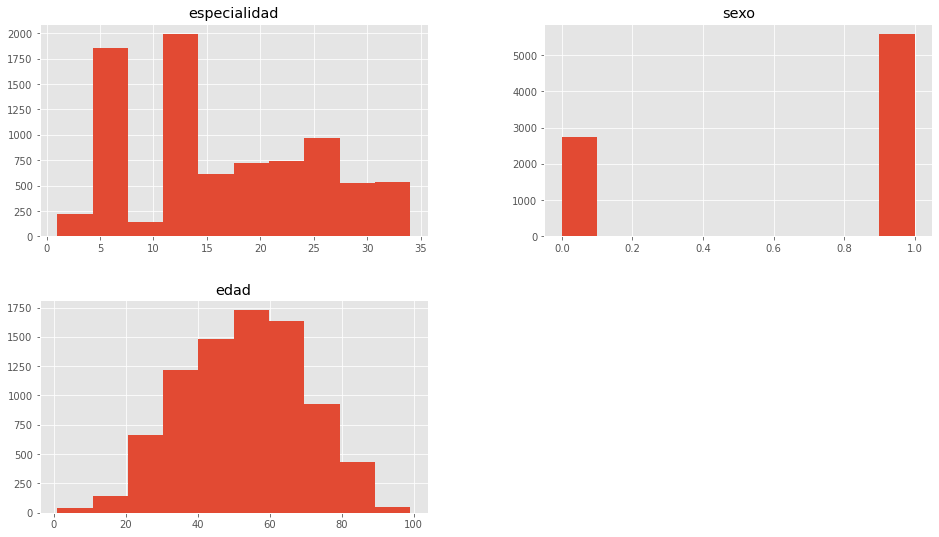

In [5]:
dataframe=dataframe.drop('idconsulta',1)
dataframe=dataframe.drop('expediente',1)
dataframe=dataframe.drop('estado',1)
dataframe=dataframe.drop('derechohabiente',1)
dataframe.drop(['municipio'],1).hist()
plt.show()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

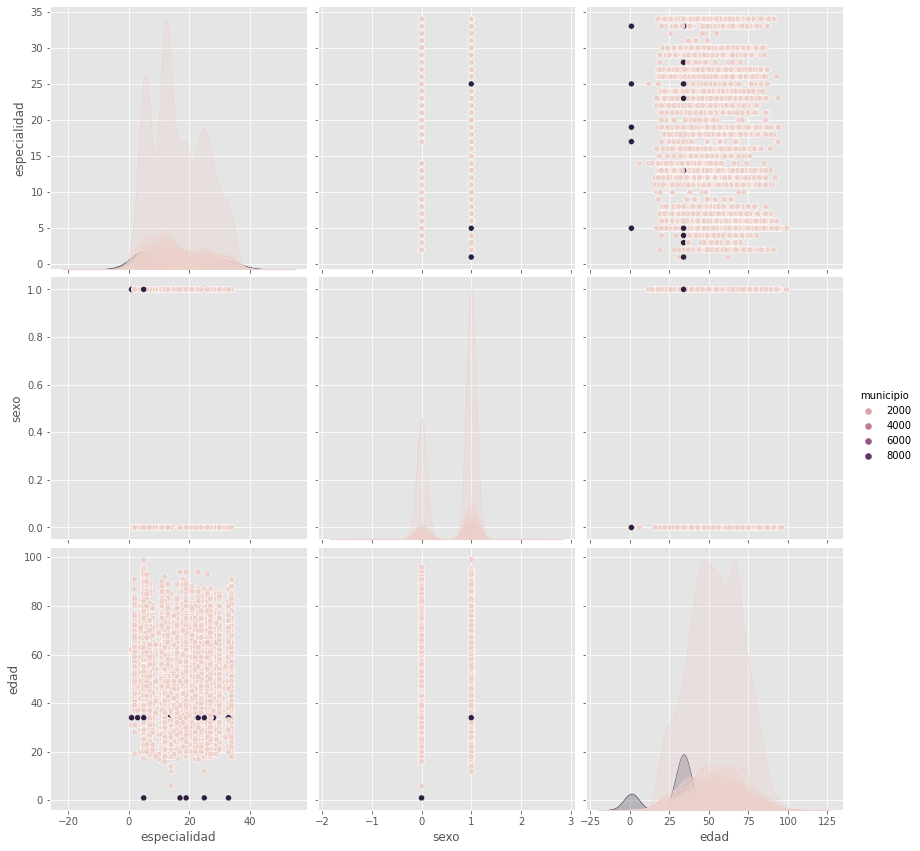

In [6]:
sb.pairplot(dataframe.dropna(), hue='municipio',size=4,vars=["especialidad","sexo","edad"],kind='scatter')

In [7]:
X = np.array(dataframe[["edad","sexo","especialidad"]])
y = np.array(dataframe['municipio'])
X.shape

(8323, 3)

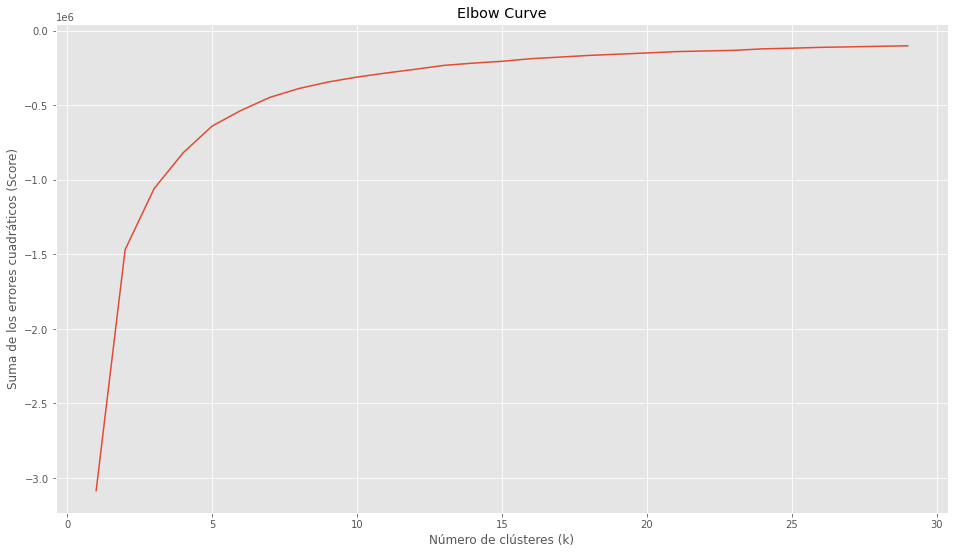

In [8]:
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos (Score)')
plt.title('Elbow Curve')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[28.67130215  0.68268015 14.62768647]
 [72.72988843  0.61009982  8.14092777]
 [51.02675737  0.73106576 10.99410431]
 [45.23997281  0.71176071 26.69136642]
 [67.54478708  0.59985316 25.74522761]]


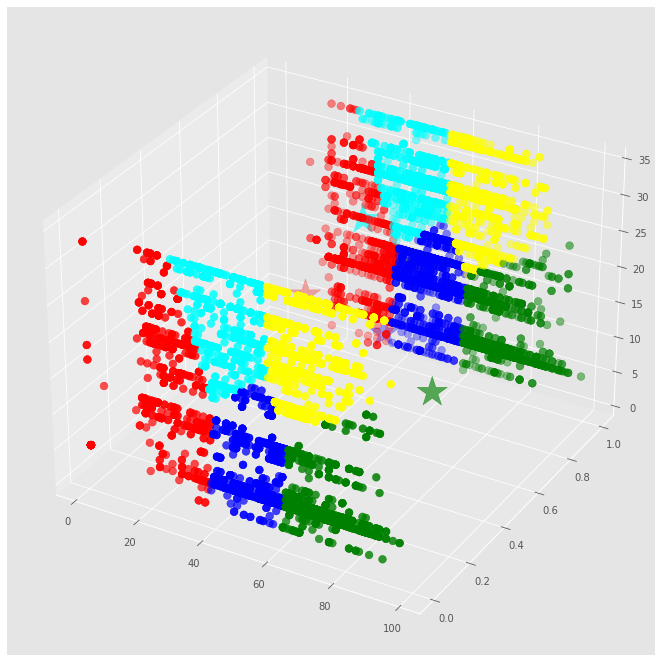

In [10]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

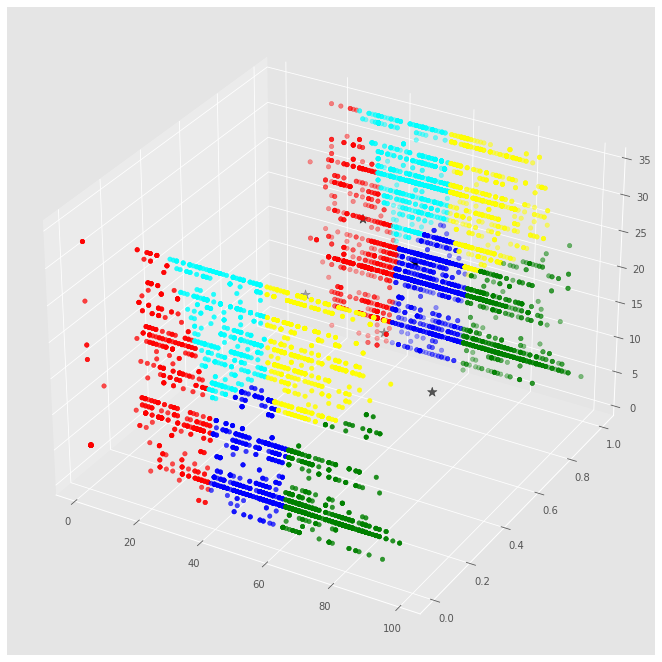

In [11]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=20)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='black', s=100)

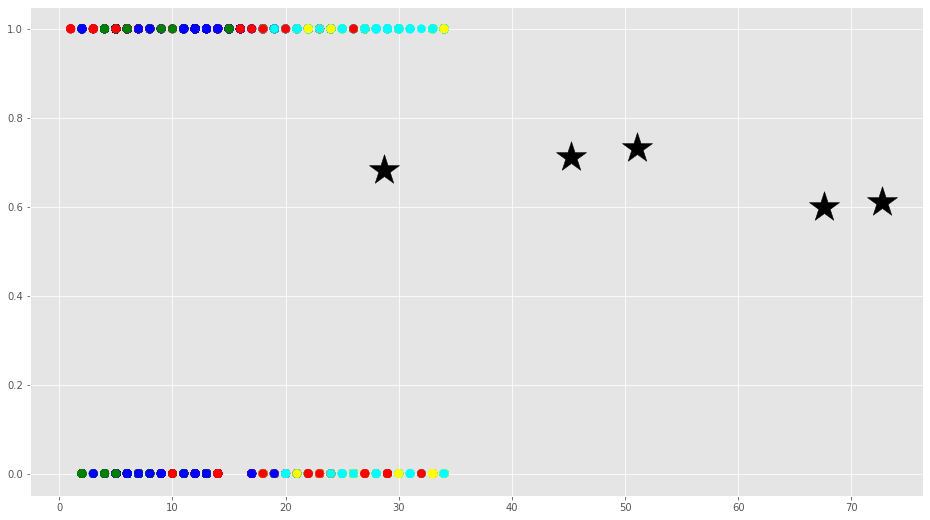

In [12]:
# Getting the values and plotting it
f1 = dataframe['especialidad'].values
f2 = dataframe['sexo'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='black', s=1000)
plt.show()

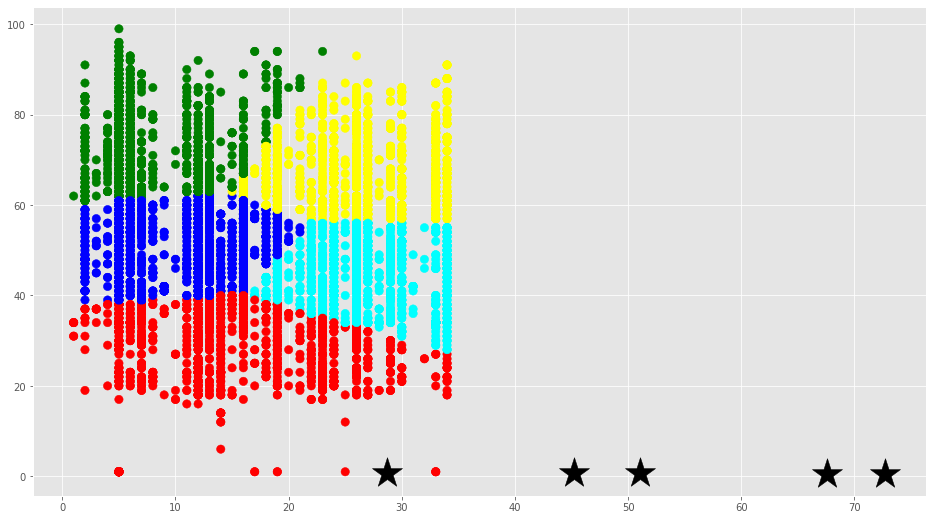

In [13]:
# Getting the values and plotting it
f1 = dataframe['especialidad'].values
f2 = dataframe['edad'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='black', s=1000)
plt.show()

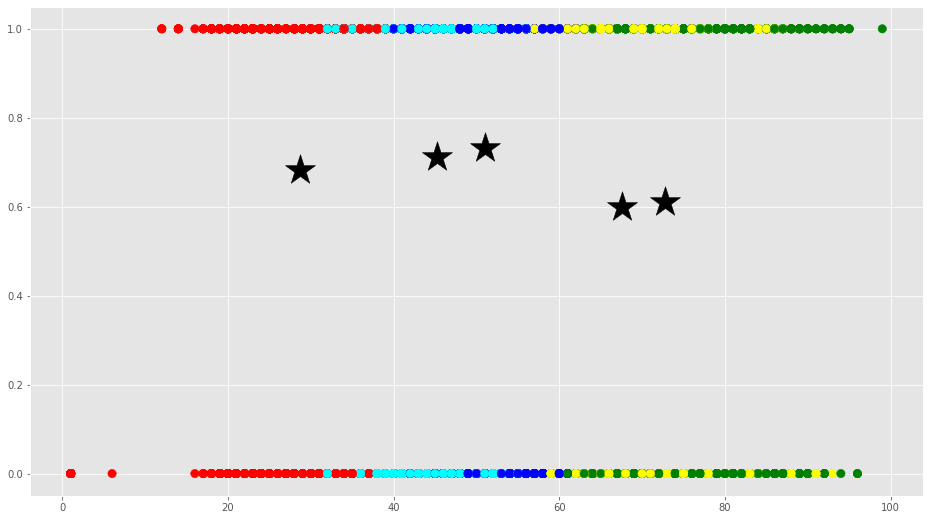

In [14]:
# Getting the values and plotting it
f1 = dataframe['edad'].values
f2 = dataframe['sexo'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='black', s=1000)
plt.show()

In [15]:
### Podemos ver cada uno de los clusters cuantos usuarios tiene:
copy =  pd.DataFrame()
copy['municipio']=dataframe['municipio'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,1582
1,green,1703
2,blue,2205
3,cyan,1471
4,yellow,1362


In [20]:
### Y podemos ver la diversidad de pacientes con sus especialidades en los municipios. 
### Por ejemplo en el grupo 2 (azul), vemos que hay de todas las especialidades que afectan a los municipios.
### Aunque predominan en los municipios 3:ACAPETAHUA,54:MAZATÁN y 107:VILLA CORZO recae el mayor número de expdientes o viistas al hospital con 47 en el año.

In [17]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['municipio']=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
diversidadGrupo['cantidad']=group_referrals.groupby('municipio').size()
diversidadGrupo

,municipio,cantidad
0,0,NaN
1,1,23.0
2,2,NaN
3,3,47.0
4,4,5.0
5,5,NaN
6,6,3.0
7,7,2.0
8,8,20.0
9,9,26.0


In [18]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['municipio']=[51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100]
diversidadGrupo['cantidad']=group_referrals.groupby('municipio').size()
diversidadGrupo

,municipio,cantidad
0,51,NaN
1,52,23.0
2,53,NaN
3,54,47.0
4,55,5.0
5,56,NaN
6,57,3.0
7,58,2.0
8,59,20.0
9,60,26.0


In [19]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['municipio']=[101,102,103,104,105,106,107,108,109,110,111]
diversidadGrupo['cantidad']=group_referrals.groupby('municipio').size()
diversidadGrupo

,municipio,cantidad
0,101,NaN
1,102,23.0
2,103,NaN
3,104,47.0
4,105,5.0
5,106,NaN
6,107,3.0
7,108,2.0
8,109,20.0
9,110,26.0


In [24]:
### Buscaremos los pacientes de expedientes que están más cerca a los centroids de cada grupo que podríamos decir que tienen 
### los rasgos de especialidad característicos que representan a cada cluster:

In [25]:
#vemos el representante del grupo, el expediente del paciente cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([1555,  427,  426, 7383, 4258], dtype=int64)

In [26]:
### lo anterior nos da la posición del expediente clinico del paciente en nuestro archivo.

In [27]:
users=dataframe['especialidad'].values
for row in closest:
    print(users[row])

14
7
11
27
26


In [28]:
### con la información anterior podemos observar que en los centros 
### tenemos las siguientes especialidades: 14. GENETICA MEDICA, 7. CIRUGIA, 11. DERMATOLOGIA, 27. ONCOLOGIA MEDICA y 26. ONCOLOGIA


In [29]:
### Y finalmente podemos agrupar y etiquetar nuevos expedientes clínicos con sus características y clasificarlos. 
### Vemos el ejemplo con un nuevo expediente clínico y nos devuelve que pertenece al grupo 2 (azul).
X_new = np.array([[45.92,57.74,15.66]]) 
new_labels = kmeans.predict(X_new)
print(new_labels)

[2]
